.ipynb settings

In [1]:
#Settings relative to .ipynb file format that have to be executed here

#Make reloading of modules automatic et évite d'avoir à redémarer le kernel et tout re executer pour appliquer la modification d'un module dans __main__.
%load_ext autoreload  
%autoreload 2

In [2]:
#src.useful_functions
import sys
sys.path.append('../src')  # Adjust the path to import modules in src/

import useful_functions

Importation of the dataset(s) and pipeline(s)

In [7]:
#Importing dataset(s)
from data import make_dataset
from pipeline import model

#Load the feat_engineered_ds:
X_train_info = make_dataset.load_data(True, 'processed/X_train_info')
X_train_01   = make_dataset.load_data(False, 'processed/X_train_01')
Y_train_00   = make_dataset.load_data(False, 'processed/Y_train_00')
X_test_info  = make_dataset.load_data(True, 'processed/X_test_info')
X_test_01    = make_dataset.load_data(False, 'processed/X_test_01')
Y_test_00    = make_dataset.load_data(False, 'processed/Y_test_00')


#Import the trained pipeline
chosen_pipeline_trained = model.load_pipeline("chosen_pipeline_trained")
chosen_pipeline = model.load_pipeline("chosen_pipeline")

The processed/X_train_info dataframe contains matchs of the seasons:  [2015 2016 2017 2018 2019 2020]


The processed/X_test_info dataframe contains matchs of the seasons:  [2021 2022 2023]


Successfully loaded the pipeline: pipeline_03_trained




# VII) <u> Pipeline results study

<span style="color:#FF1493;"> <strong> <font size="4">1) Probabilities calibration and distribution study

In [8]:
#src.pipeline.results
from pipeline import results
from sklearn.base import clone

#Make proba predictions retraining the pipeline at every Game Week or every Season:
proba_pred_GW_training, Y_test_00_GW_training, X_info_GW_training = results.proba_prediction_model_retrained_each_GW(names_col_to_concat,
names_col_concatenated,
col_to_remove,
contextual_col,
clone(chosen_pipeline),
test_seasons,
'seas',
feat_engineered_ds.copy())

#Make 'normal' proba predictions on the test_seasons (defined in V)1) )
normal_proba_pred = chosen_pipeline_trained.predict_proba(X_test_01)[:,1]

Y_test_01 = Y_test_00_GW_training
proba_pred = proba_pred_GW_training


#Plot Calibration curve of the pipeline and info about its bins
prob_pred_01, prob_true_01 = results.plot_calibration_curve_2(
                                Y_test_0 = Y_test_01.copy(),
                                X_train_0 = X_train_01.copy(),
                                proba_pred_0 = proba_pred.copy(),
                                n_bins_0 = 20,
                                strategy_0 = 'quantile',
                                color_0 = 'red',
                                GW_training_or_not = True)

#We display statistics on the pipeline probabilities deviation 
results.print_calibration_stats(prob_pred_01.copy(),
                                prob_true_01.copy(),
                                'non calibrated')

#We plot the histogram of the proba predicted by the non calibrated pipeline
results.plot_histo_predicted_proba(proba_pred.copy(), 30, 'r', 'predicted probabilities')

# Display the ratio (probabilities pred/nb of true targets)
results.ratio_proba__sum_true_target(X_train_01.copy(), Y_train_00.copy(), X_test_01.copy(), Y_test_00.copy(), chosen_pipeline_trained)


NameError: name 'names_col_to_concat' is not defined

<span style="color:#FF1493;"> <strong> <font size="4">2) Probabilities calibration and distribution study depending on different parameters

Calibration curve of proba predicted on matches where Played_matches_nb C [ 6 , 21 ]


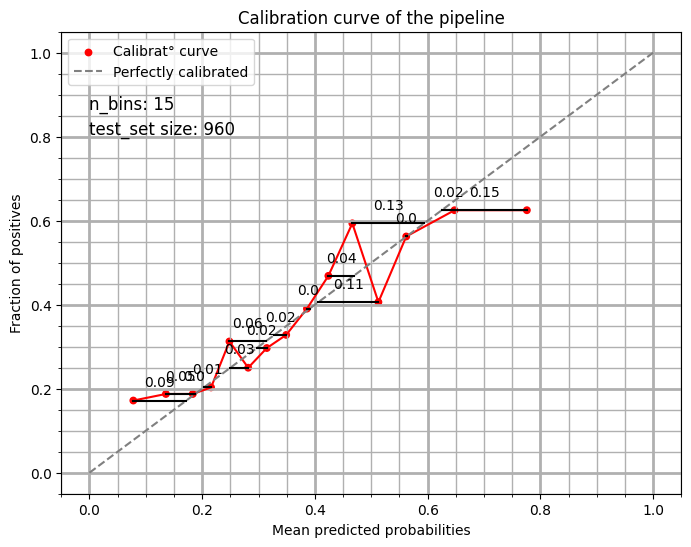

Above learning curve statistics on bins:

╒════╤════════════════╤═════════════════════════════╕
│    │ Bin interval   │   Predictions nb in the bin │
╞════╪════════════════╪═════════════════════════════╡
│  0 │ [0.02, 0.11]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  1 │ [0.11, 0.16]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  2 │ [0.16, 0.2]    │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  3 │ [0.2, 0.23]    │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  4 │ [0.23, 0.27]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  5 │ [0.27, 0.3]    │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  6 │ [0.3, 0.33]    │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  7 │ [0.33, 0.37]   │                 

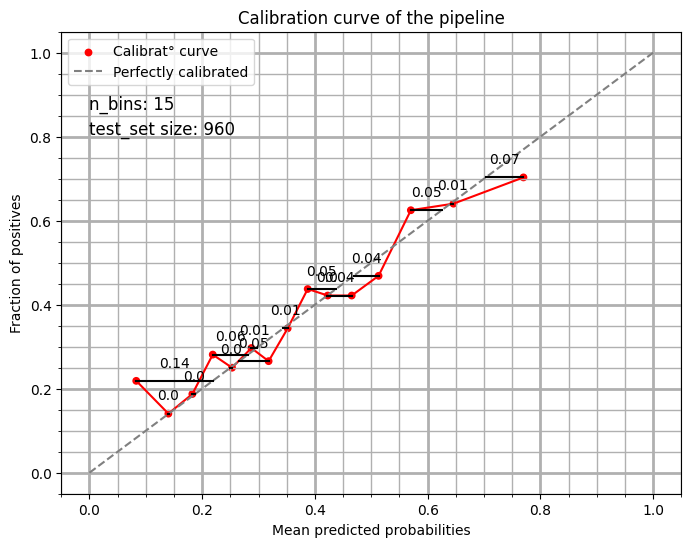

Above learning curve statistics on bins:

╒════╤════════════════╤═════════════════════════════╕
│    │ Bin interval   │   Predictions nb in the bin │
╞════╪════════════════╪═════════════════════════════╡
│  0 │ [0.02, 0.12]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  1 │ [0.12, 0.16]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  2 │ [0.16, 0.2]    │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  3 │ [0.2, 0.23]    │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  4 │ [0.23, 0.27]   │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  5 │ [0.27, 0.3]    │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  6 │ [0.3, 0.33]    │                          64 │
├────┼────────────────┼─────────────────────────────┤
│  7 │ [0.33, 0.37]   │                 

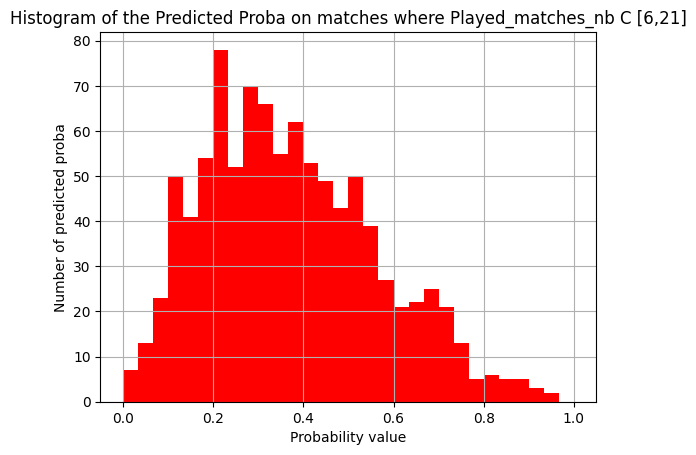

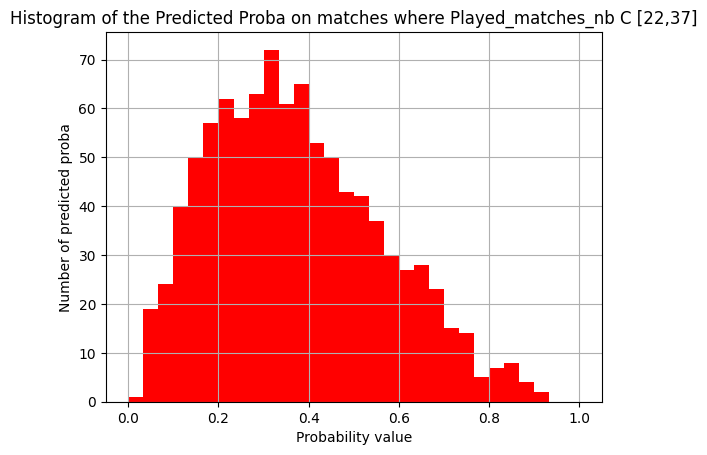

In [ ]:
#src.pipeline.results

# We divide the dataframe in n subdataframes classified following the nb of played matches
subdatasets = results.calibration_over_season_advancement(2, X_info_GW_training, proba_pred_GW_training, Y_test_00_GW_training)

#Plot Calibration curves for each of these dataframes
results.calibration_curves_subdataframes(subdatasets, 15, 30, True)



<span style="color:#FF1493;"> <strong> <font size="4">3) Model coefficients study

In [ ]:
#src.pipeline.results
results.features_coeff_report(chosen_pipeline_trained, X_train_01)

[[ 0.10018356  0.15115087 -0.12287793  0.03344592  0.22426076  0.04133386
   0.15115087  0.05448999  0.04244884  0.04194004 -0.05178468  0.18070542
   0.02566891  0.42957842]]
╒═════════════════════════════════════════════════╤═══════════════╕
│ Feature                                         │   Coefficient │
╞═════════════════════════════════════════════════╪═══════════════╡
│ Diff_Avg_points_pm_ponderated_by_adversary_perf │     0.100184  │
├─────────────────────────────────────────────────┼───────────────┤
│ Diff_Avg_goal_diff                              │     0.151151  │
├─────────────────────────────────────────────────┼───────────────┤
│ Diff_Avg_scored_g_conceeded_g_ratio             │    -0.122878  │
├─────────────────────────────────────────────────┼───────────────┤
│ Diff_Avg_collected_points                       │     0.0334459 │
├─────────────────────────────────────────────────┼───────────────┤
│ Diff_Annual_budget                              │     0.224261  │
├───────